In [1]:
install.packages('caTools')
library(caTools) # it helps in splitting the dataset

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [25]:
dataset = read.csv('social.csv')

# Taking columns 3-5
dataset = dataset[3:5]

In [26]:
head(dataset)

,Age,EstimatedSalary,Purchased
,<int>,<int>,<int>
1,19,19000,0
2,35,20000,0
3,26,43000,0
4,27,57000,0
5,19,76000,0
6,27,58000,0


In [27]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [28]:
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)

training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [29]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])


In [19]:
# training_set[1:2, ]

,Age,EstimatedSalary,Purchased
,<dbl>,<dbl>,<fct>
1,-1.765548,-1.4733414,0
3,-1.096297,-0.7883761,0


In [31]:
# Fitting SVM to the Training set
install.packages('e1071')
library(e1071)

classifier = svm(formula = Purchased ~ .,
				data = training_set,
				type = 'C-classification',
				kernel = 'linear')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])


In [33]:
y_pred

2   4   5   9  12  18  19  20  22  29  32  34  35  38  45  46  48  52  66  69 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 74  75  82  84  85  86  87  89 103 104 107 108 109 117 124 126 127 131 134 139 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
148 154 156 159 162 163 170 175 176 193 199 200 208 213 224 226 228 229 230 234 
  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   0   1   0   1   1 
236 237 239 241 255 264 265 266 273 274 281 286 292 299 302 305 307 310 316 324 
  1   0   1   1   1   0   1   1   1   1   1   0   1   1   1   0   1   0   0   0 
326 332 339 341 343 347 353 363 364 367 368 369 372 373 380 383 389 392 395 400 
  0   1   0   1   0   1   1   0   1   1   1   0   1   0   1   1   0   0   0   0 
Levels: 0 1

In [34]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 57  7
  1 13 23

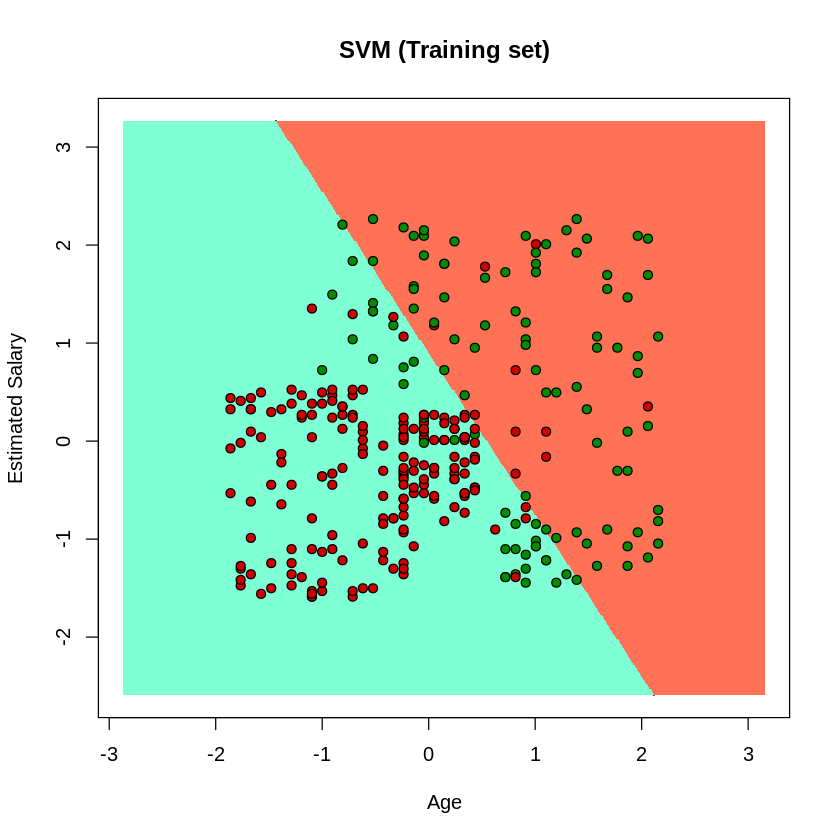

In [38]:
# Plotting the training data set results
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)

grid_set = expand.grid(X1, X2)
# print(grid_set)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)

plot(set[, -3],
	main = 'SVM (Training set)',
	xlab = 'Age', ylab = 'Estimated Salary',
	xlim = range(X1), ylim = range(X2))

contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)

points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'coral1', 'aquamarine'))

points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

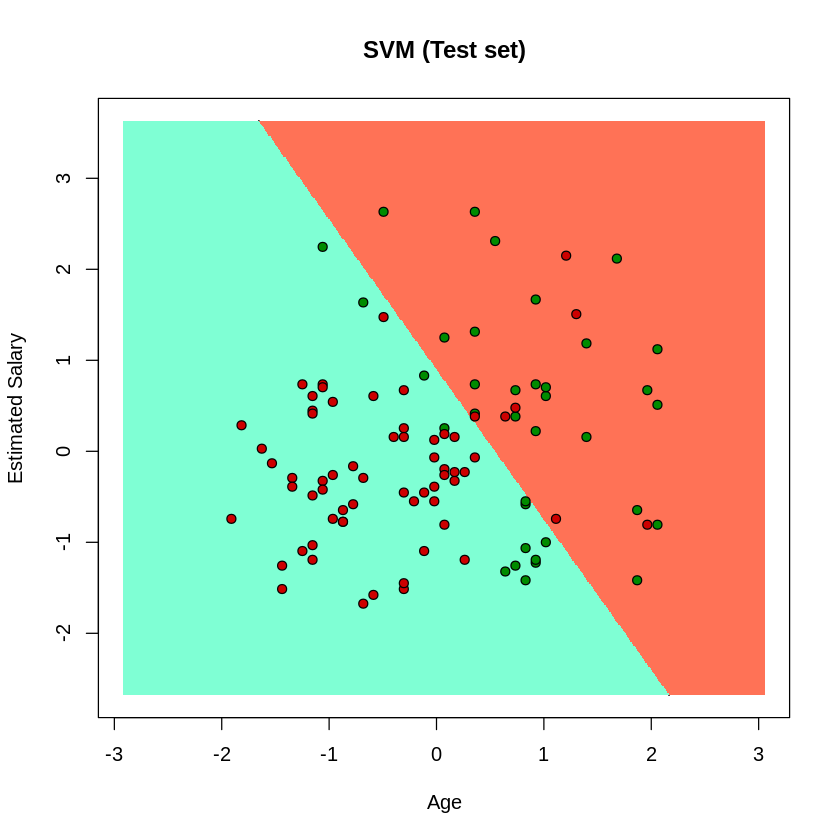

In [ ]:
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)

grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)

plot(set[, -3], main = 'SVM (Test set)',
	xlab = 'Age', ylab = 'Estimated Salary',
	xlim = range(X1), ylim = range(X2))

contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)

points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'coral1', 'aquamarine'))

points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))
